# Pymaceuticals Inc.
---

### Analysis

- Each drug was tested fairly evenly in the study, with the most attention given to our drug Capomulin and a competitor drug, Ramicane. These drugs had the most timepoint measurements, and we can thus infer that the mice studied using these drugs did not pass away during the trials at as high a rate as other drugs in the study. 
- The male and female populations of mice used in the study were nearly even.
- Narrowing down to the four most promising drugs, two stood out as having the smallest tumor volumes at the end of the study: Capomulin and Ramicane. Infubinol should be recognized as having a dramatic outlier in their dataset with a small tumor at the end of the study, and this case should be investigated specifically as a follow-up (while it's data is also scrutinized). 
- Capomulin appears to take approximately 20 days to start having an effect on shrinking tumor volume; tumor size can re-increase periodically afterword before further shrinkage. Further study is needed to verify that the drug continues to have this effect after 35 days of use. 
- For Capomulin, the final weight of the subject was lienarlly correlated with the average volume of their tumor as measured throughout the study. This shows that the drug has consistent results for mice of a range of sizes. 
 

In [178]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [179]:
# Checking the number of mice.
number_mice = len(combined_df["Mouse ID"].unique())
number_mice

249

In [180]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"],keep=False)]
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [181]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_df[combined_df["Mouse ID"]=="g989"]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [182]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [183]:
# Checking the number of mice in the clean DataFrame.
updated_number_mice = len(clean_df["Mouse ID"].unique())
updated_number_mice

248

## Summary Statistics

In [184]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_df = clean_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_df['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_df['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_df['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_df['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [185]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

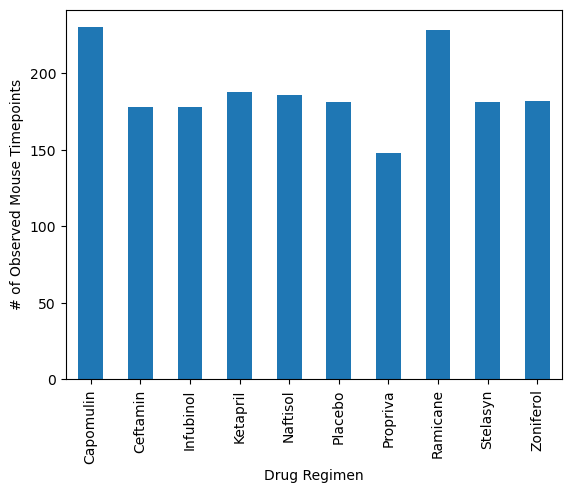

In [186]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data = grouped_df["Timepoint"].count()
ax = data.plot(x='Drug Regimen', y='Timepoint', kind='bar')
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
plt.show() #this is technically unneccessary but cleans up the output

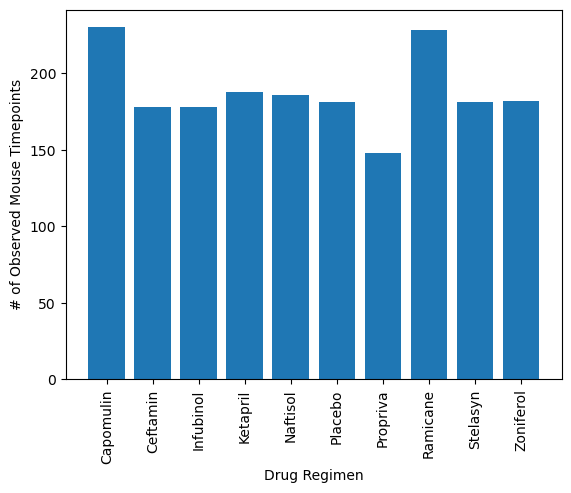

In [187]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = grouped_df["Timepoint"].count().index.tolist()
counts = grouped_df["Timepoint"].count().values.tolist()
plt.bar(regimen, counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

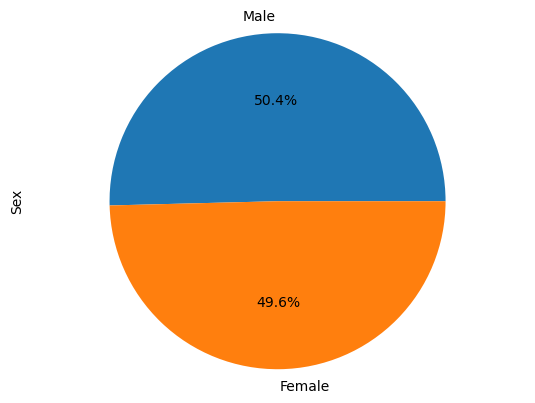

In [188]:
#Please note that the starter file had this calculated as 51.0% Male, 49.0% female, and I believe this was an error. 
#I think they are generating this based on value counting the sexes of the clean dataframe, as clean_df['Sex'].value_counts()
#However, this isn't correct because some mice have more Timepoints recorded than others, and it slightly skews the data.
#This is corrected below

# Generate a pie plot showing the distribution of female versus male mice using Pandas
#setup the data
unique_mice_sex = clean_df.drop_duplicates(subset=['Mouse ID'])[['Mouse ID', 'Sex']]
sex_data = unique_mice_sex['Sex'].value_counts()

#create the plot
sex_data.plot.pie(autopct='%1.1f%%')

#The following formatting wasn't totally necessary, but cleans it up to make the charts match
plt.ylabel("Sex")
plt.axis('equal')
plt.show()

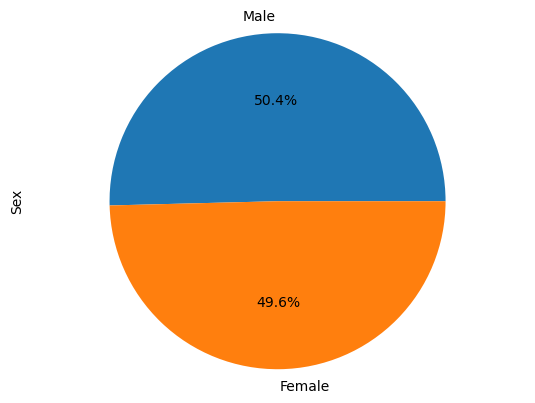

In [189]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#setup the data
genders = sex_data.index.tolist()
gender_counts = sex_data.values.tolist()

#create the plot
plt.pie(gender_counts,labels=genders, autopct='%1.1f%%')

#format
plt.ylabel("Sex")
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [190]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filtered_clean_df = clean_df.merge(max_timepoint_df, on=['Mouse ID', 'Timepoint'])
filtered_clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [191]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_values = filtered_clean_df[filtered_clean_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"].values
      
    # add subset
    tumor_volume_data.append(tumor_values)
    
    # Determine outliers using upper and lower bounds
    Q1 = np.percentile(tumor_values, 25)
    Q3 = np.percentile(tumor_values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [value for value in tumor_values if value < lower_bound or value > upper_bound]
    print(f"{treatment}'s potential outliers:  {outliers}")


Capomulin's potential outliers:  []
Ramicane's potential outliers:  []
Infubinol's potential outliers:  [36.3213458]
Ceftamin's potential outliers:  []


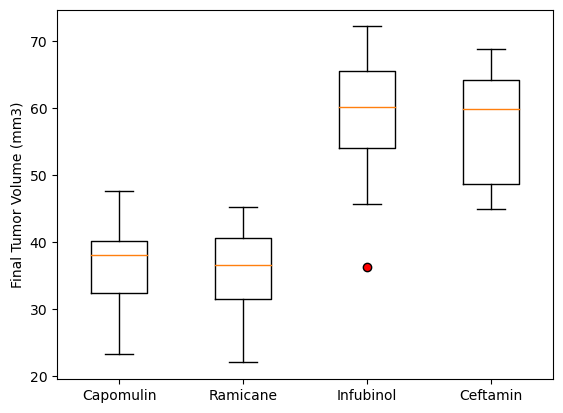

In [192]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red'))
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

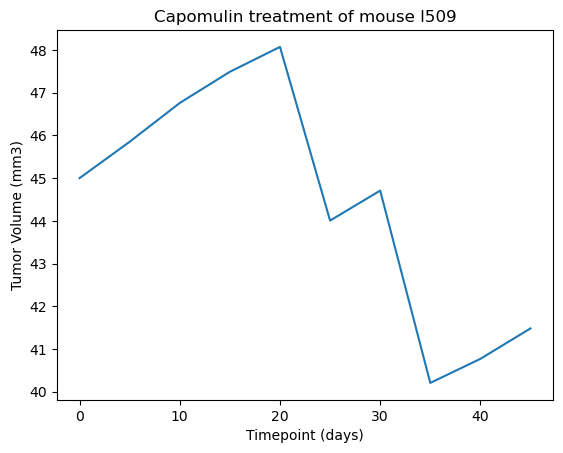

In [193]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
time_data = clean_df[clean_df["Mouse ID"]=="l509"]["Timepoint"].values
tumor_volume_data2 = clean_df[clean_df["Mouse ID"]=="l509"]["Tumor Volume (mm3)"].values

fig, ax = plt.subplots()
ax.plot(time_data, tumor_volume_data2)
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Capomulin treatment of mouse l509")

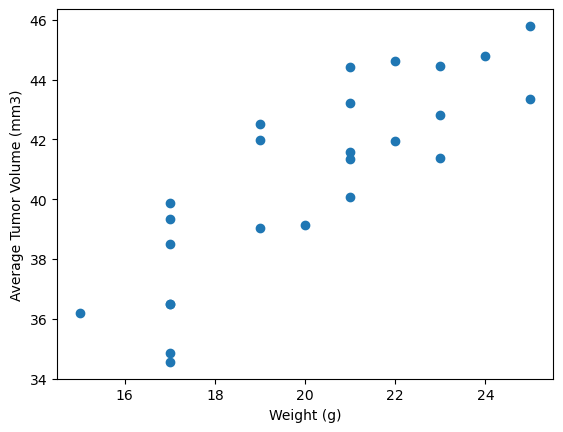

In [194]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Grab the final weights of each mouse in the Capomulin Regimen
capomulin_end_data = filtered_clean_df[filtered_clean_df["Drug Regimen"]=="Capomulin"]
capomulin_weights = capomulin_end_data["Weight (g)"]

# Create empty list to fill with tumor vol data (for plotting)
average_tumor_sizes = []

# Find the mean tumor volume over the lifetime of the study for each mouse
for mouse in capomulin_end_data["Mouse ID"].values:
    mouse_tumor_size = clean_df[clean_df["Mouse ID"]==mouse]["Tumor Volume (mm3)"].mean()
    average_tumor_sizes.append(mouse_tumor_size)

# Scatter plot and format
fig, ax = plt.subplots()
ax.scatter(capomulin_weights, average_tumor_sizes)
ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


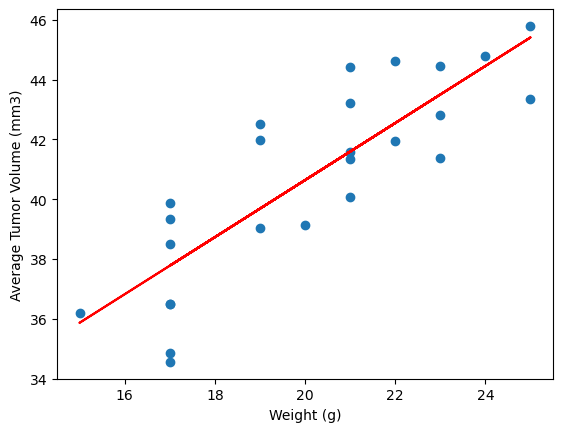

In [195]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation coefficient
correlation_coefficient, _ = st.pearsonr(capomulin_weights, average_tumor_sizes)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient,2)}.")

# linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_weights, average_tumor_sizes)

# linear regression line
line = slope * capomulin_weights + intercept

#create the plots
fig, ax = plt.subplots()
ax.scatter(capomulin_weights, average_tumor_sizes)
plt.plot(capomulin_weights, line, color='red')
ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")
plt.show()